# 推荐算法代码

![rm](../img_re/RM.png)


**工业界常用推荐系统模型**
+ 召回策略：热度，LBS，user tag，itemcf，频繁模式挖掘，二部图挖掘，embedding（word2vec、fasttext、bert），deep match
+ 排序策略，learning to rank 流程三大模式（pointwise、pairwise、listwise），常见的特征挖掘（user、item、context，以及相互交叉），ctr预估（lr、gbdt、fm、ffm、dnn、widedeep、dcn、deepfm）
+ 探索与发现（bandit、Q-Learning、DQN）
+ 推荐理由：统计式（如：top5热门），推荐语生成（抽取式，生成式）  
[Re链接](https://www.zhihu.com/question/314773668/answer/632369879)

+ 阿里的 DIN
+ Airbnb 的类似 word2vec 的 item2vec 的 embedding
+ Facebook 的 GBT + LR 的 stacking

### 1. 关联规则挖掘

In [3]:
#1) 基于growth算法进行频繁项集挖掘
import csv
from fp_growth import find_frequent_itemsets

# transactions=[]
# for row in csv.reader("../data/tsk.csv"):
#     transactions.append(row)
simple_data = [['r', 'z', 'h', 'j', 'p'],
               ['z', 'y', 'x', 'w', 'v', 'u', 't', 's'], ['z'],
               ['r', 'x', 'n', 'o', 's'], ['y', 'r', 'x', 'z', 'q', 't', 'p'],
               ['y', 'z', 'x', 'e', 'q', 's', 't', 'm']]
for itemset in find_frequent_itemsets(simple_data, 2, include_support=True):
    print(itemset)

(['s'], 3)
(['z', 's'], 2)
(['x', 's'], 3)
(['z', 'x', 's'], 2)
(['y', 's'], 2)
(['x', 'y', 's'], 2)
(['z', 'x', 'y', 's'], 2)
(['z', 'y', 's'], 2)
(['z'], 5)
(['p'], 2)
(['z', 'p'], 2)
(['r', 'p'], 2)
(['z', 'r', 'p'], 2)
(['r'], 3)
(['x', 'r'], 2)
(['z', 'r'], 2)
(['t'], 3)
(['z', 't'], 3)
(['x', 't'], 3)
(['z', 'x', 't'], 3)
(['y', 't'], 3)
(['x', 'y', 't'], 3)
(['z', 'x', 'y', 't'], 3)
(['z', 'y', 't'], 3)
(['x'], 4)
(['z', 'x'], 3)
(['y'], 3)
(['x', 'y'], 3)
(['z', 'x', 'y'], 3)
(['z', 'y'], 3)
(['q'], 2)
(['z', 'q'], 2)
(['t', 'q'], 2)
(['z', 't', 'q'], 2)
(['x', 't', 'q'], 2)
(['z', 'x', 't', 'q'], 2)
(['y', 't', 'q'], 2)
(['x', 'y', 't', 'q'], 2)
(['z', 'x', 'y', 't', 'q'], 2)
(['z', 'y', 't', 'q'], 2)
(['x', 'q'], 2)
(['z', 'x', 'q'], 2)
(['y', 'q'], 2)
(['x', 'y', 'q'], 2)
(['z', 'x', 'y', 'q'], 2)
(['z', 'y', 'q'], 2)


In [42]:
#2) 基于工具包Orange3：根据FP-growth算法进行关联规则挖掘 pip install orange3-associate
import pandas as pd
import functools
import orangecontrib.associate.fpgrowth as fpg
#ignore  warning

strSet = set(functools.reduce(lambda a, b: a + b, simple_data))
strEncode = dict(zip(strSet, range(
    len(strSet))))  #编码字典，即:{'ArticleTag_BS': 6,'Country_Argentina': 53,etc...}
strDecode = dict(zip(strEncode.values(), strEncode.keys())
                 )  #解码字典，即:{6:'ArticleTag_BS',53:'Country_Argentina',etc...}
simple_data_int = [
    list(map(lambda item: strEncode[item], row)) for row in simple_data
]
itemsets = dict(fpg.frequent_itemsets(simple_data_int, 0.3))  #最小支持度
rules = fpg.association_rules(itemsets, 0.5)  #最小置信度
result = list(fpg.rules_stats(rules, itemsets, len(simple_data_int)))
df = pd.DataFrame(result,
                  columns=('a', 'b', '项集出现数目', '置信度', '支持度', '力度', '提升度',
                           '利用度'))
df['关联规则'] = df[['a', 'b']].apply(lambda i: '&'.join(
    [strDecode[j]
     for j in i['a']]) + '==>' + '&'.join([strDecode[j] for j in i['b']]),
                                  axis=1)
df = df[['关联规则', '置信度', '支持度', '提升度']]
df

,关联规则,置信度,支持度,提升度
0,q&t&x&y==>z,1.000000,0.333333,1.200000
1,z&t&y&q==>x,1.000000,0.333333,1.500000
2,q&t&y==>z&x,1.000000,0.333333,2.000000
3,z&y&q==>t&x,1.000000,0.333333,2.000000
4,q&y==>z&t&x,1.000000,0.333333,2.000000
5,z&q==>t&x&y,1.000000,0.333333,2.000000
6,q==>z&t&x&y,1.000000,0.333333,2.000000
7,z&y==>q&t&x,0.666667,0.500000,2.000000
8,y==>q&t&x&z,0.666667,0.500000,2.000000
9,z&t&q==>x&y,1.000000,0.333333,2.000000


### 2.基于协同过滤

In [1]:
#!python ./MovieLens-RecSys/usercf.py
#-*- coding: utf-8 -*-
'''
Created on 2015-06-22

@author: Lockvictor
'''
import sys
import random
import math
import os
from operator import itemgetter

from collections import defaultdict

random.seed(0)


class UserBasedCF(object):
    ''' TopN recommendation - User Based Collaborative Filtering '''

    def __init__(self):
        self.trainset = {}
        self.testset = {}

        self.n_sim_user = 20
        self.n_rec_movie = 10

        self.user_sim_mat = {}
        self.movie_popular = {}
        self.movie_count = 0

        print ('Similar user number = %d' % self.n_sim_user, file=sys.stderr)
        print ('recommended movie number = %d' %
               self.n_rec_movie, file=sys.stderr)

    @staticmethod
    def loadfile(filename):
        ''' load a file, return a generator. '''
        fp = open(filename, 'r')
        for i, line in enumerate(fp):
            yield line.strip('\r\n')
            if i % 100000 == 0:
                print ('loading %s(%s)' % (filename, i), file=sys.stderr)
        fp.close()
        print ('load %s succ' % filename, file=sys.stderr)

    def generate_dataset(self, filename, pivot=0.7):
        ''' load rating data and split it to training set and test set '''
        trainset_len = 0
        testset_len = 0

        for line in self.loadfile(filename):
            user, movie, rating, _ = line.split('::')
            # split the data by pivot
            if random.random() < pivot:
                self.trainset.setdefault(user, {})
                self.trainset[user][movie] = int(rating)
                trainset_len += 1
            else:
                self.testset.setdefault(user, {})
                self.testset[user][movie] = int(rating)
                testset_len += 1

        print ('split training set and test set succ', file=sys.stderr)
        print ('train set = %s' % trainset_len, file=sys.stderr)
        print ('test set = %s' % testset_len, file=sys.stderr)

    def calc_user_sim(self):
        ''' calculate user similarity matrix '''
        # build inverse table for item-users
        # key=movieID, value=list of userIDs who have seen this movie
        print ('building movie-users inverse table...', file=sys.stderr)
        movie2users = dict()

        for user, movies in self.trainset.items():
            for movie in movies:
                # inverse table for item-users
                if movie not in movie2users:
                    movie2users[movie] = set()
                movie2users[movie].add(user)
                # count item popularity at the same time
                if movie not in self.movie_popular:
                    self.movie_popular[movie] = 0
                self.movie_popular[movie] += 1
        print ('build movie-users inverse table succ', file=sys.stderr)

        # save the total movie number, which will be used in evaluation
        self.movie_count = len(movie2users)
        print ('total movie number = %d' % self.movie_count, file=sys.stderr)

        # count co-rated items between users
        usersim_mat = self.user_sim_mat
        print ('building user co-rated movies matrix...', file=sys.stderr)

        for movie, users in movie2users.items():
            for u in users:
                usersim_mat.setdefault(u, defaultdict(int))
                for v in users:
                    if u == v:
                        continue
                    usersim_mat[u][v] += 1
        print ('build user co-rated movies matrix succ', file=sys.stderr)

        # calculate similarity matrix
        print ('calculating user similarity matrix...', file=sys.stderr)
        simfactor_count = 0
        PRINT_STEP = 2000000

        for u, related_users in usersim_mat.items():
            for v, count in related_users.items():
                usersim_mat[u][v] = count / math.sqrt(
                    len(self.trainset[u]) * len(self.trainset[v]))
                simfactor_count += 1
                if simfactor_count % PRINT_STEP == 0:
                    print ('calculating user similarity factor(%d)' %
                           simfactor_count, file=sys.stderr)

        print ('calculate user similarity matrix(similarity factor) succ',
               file=sys.stderr)
        print ('Total similarity factor number = %d' %
               simfactor_count, file=sys.stderr)

    def recommend(self, user):
        ''' Find K similar users and recommend N movies. '''
        K = self.n_sim_user
        N = self.n_rec_movie
        rank = dict()
        watched_movies = self.trainset[user]

        for similar_user, similarity_factor in sorted(self.user_sim_mat[user].items(),
                                                      key=itemgetter(1), reverse=True)[0:K]:
            for movie in self.trainset[similar_user]:
                if movie in watched_movies:
                    continue
                # predict the user's "interest" for each movie
                rank.setdefault(movie, 0)
                rank[movie] += similarity_factor
        # return the N best movies
        return sorted(rank.items(), key=itemgetter(1), reverse=True)[0:N]

    def evaluate(self):
        ''' print evaluation result: precision, recall, coverage and popularity '''
        print ('Evaluation start...', file=sys.stderr)

        N = self.n_rec_movie
        #  varables for precision and recall
        hit = 0
        rec_count = 0
        test_count = 0
        # varables for coverage
        all_rec_movies = set()
        # varables for popularity
        popular_sum = 0

        for i, user in enumerate(self.trainset):
            if i % 500 == 0:
                print ('recommended for %d users' % i, file=sys.stderr)
            test_movies = self.testset.get(user, {})
            rec_movies = self.recommend(user)
            for movie, _ in rec_movies:
                if movie in test_movies:
                    hit += 1
                all_rec_movies.add(movie)
                popular_sum += math.log(1 + self.movie_popular[movie])
            rec_count += N
            test_count += len(test_movies)

        precision = hit / (1.0 * rec_count)
        recall = hit / (1.0 * test_count)
        coverage = len(all_rec_movies) / (1.0 * self.movie_count)
        popularity = popular_sum / (1.0 * rec_count)

        print ('precision=%.4f\trecall=%.4f\tcoverage=%.4f\tpopularity=%.4f' %
               (precision, recall, coverage, popularity), file=sys.stderr)


if __name__ == '__main__':
    root_path = os.path.dirname(os.path.abspath(__file__))
    ratingfile = os.path.join(root_path+'/ml-1m', 'ratings.dat')
    usercf = UserBasedCF()
    usercf.generate_dataset(ratingfile)
    usercf.calc_user_sim()
    usercf.evaluate()

root_path: /home/liuting/ML_Note/ipython/MovieLens-RecSys
ratingfile: /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat
Similar user number = 20
recommended movie number = 10
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(0)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(100000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(200000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(300000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(400000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(500000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(600000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(700000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(800000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(900000)
loadi

In [ ]:
#rating.dat 样例
1::1193::5::978300760
1::661::3::978302109
1::914::3::978301968
1::3408::4::978300275
1::2355::5::978824291
1::1197::3::978302268
1::1287::5::978302039
1::2804::5::978300719
1::594::4::978302268
1::919::4::978301368
1::595::5::978824268
1::938::4::978301752
1::2398::4::978302281
1::2918::4::978302124
1::1035::5::978301753
1::2791::4::978302188

In [3]:
#!python ./MovieLens-RecSys/itemcf.py
#-*- coding: utf-8 -*-
'''
Created on 2015-06-22

@author: Lockvictor
'''
import sys
import random
import math
import os
from operator import itemgetter

from collections import defaultdict

random.seed(0)


class ItemBasedCF(object):
    ''' TopN recommendation - Item Based Collaborative Filtering '''

    def __init__(self):
        self.trainset = {}
        self.testset = {}

        self.n_sim_movie = 20
        self.n_rec_movie = 10

        self.movie_sim_mat = {}
        self.movie_popular = {}
        self.movie_count = 0

        print('Similar movie number = %d' % self.n_sim_movie, file=sys.stderr)
        print('Recommended movie number = %d' %
              self.n_rec_movie, file=sys.stderr)

    @staticmethod
    def loadfile(filename):
        ''' load a file, return a generator. '''
        fp = open(filename, 'r')
        for i, line in enumerate(fp):
            yield line.strip('\r\n')
            if i % 100000 == 0:
                print ('loading %s(%s)' % (filename, i), file=sys.stderr)
        fp.close()
        print ('load %s succ' % filename, file=sys.stderr)

    def generate_dataset(self, filename, pivot=0.7):
        ''' load rating data and split it to training set and test set '''
        trainset_len = 0
        testset_len = 0

        for line in self.loadfile(filename):
            user, movie, rating, _ = line.split('::')
            # split the data by pivot
            if random.random() < pivot:
                self.trainset.setdefault(user, {})
                self.trainset[user][movie] = int(rating)
                trainset_len += 1
            else:
                self.testset.setdefault(user, {})
                self.testset[user][movie] = int(rating)
                testset_len += 1

        print ('split training set and test set succ', file=sys.stderr)
        print ('train set = %s' % trainset_len, file=sys.stderr)
        print ('test set = %s' % testset_len, file=sys.stderr)

    def calc_movie_sim(self):
        ''' calculate movie similarity matrix '''
        print('counting movies number and popularity...', file=sys.stderr)

        for user, movies in self.trainset.items():
            for movie in movies:
                # count item popularity
                if movie not in self.movie_popular:
                    self.movie_popular[movie] = 0
                self.movie_popular[movie] += 1

        print('count movies number and popularity succ', file=sys.stderr)

        # save the total number of movies
        self.movie_count = len(self.movie_popular)
        print('total movie number = %d' % self.movie_count, file=sys.stderr)

        # count co-rated users between items
        itemsim_mat = self.movie_sim_mat
        print('building co-rated users matrix...', file=sys.stderr)

        for user, movies in self.trainset.items():
            for m1 in movies:
                itemsim_mat.setdefault(m1, defaultdict(int))
                for m2 in movies:
                    if m1 == m2:
                        continue
                    itemsim_mat[m1][m2] += 1

        print('build co-rated users matrix succ', file=sys.stderr)

        # calculate similarity matrix
        print('calculating movie similarity matrix...', file=sys.stderr)
        simfactor_count = 0
        PRINT_STEP = 2000000

        for m1, related_movies in itemsim_mat.items():
            for m2, count in related_movies.items():
                itemsim_mat[m1][m2] = count / math.sqrt(
                    self.movie_popular[m1] * self.movie_popular[m2])
                simfactor_count += 1
                if simfactor_count % PRINT_STEP == 0:
                    print('calculating movie similarity factor(%d)' %
                          simfactor_count, file=sys.stderr)

        print('calculate movie similarity matrix(similarity factor) succ',
              file=sys.stderr)
        print('Total similarity factor number = %d' %
              simfactor_count, file=sys.stderr)

    def recommend(self, user):
        ''' Find K similar movies and recommend N movies. '''
        K = self.n_sim_movie
        N = self.n_rec_movie
        rank = {}
        watched_movies = self.trainset[user]

        for movie, rating in watched_movies.items():
            for related_movie, similarity_factor in sorted(self.movie_sim_mat[movie].items(),
                                                           key=itemgetter(1), reverse=True)[:K]:
                if related_movie in watched_movies:
                    continue
                rank.setdefault(related_movie, 0)
                rank[related_movie] += similarity_factor * rating
        # return the N best movies
        return sorted(rank.items(), key=itemgetter(1), reverse=True)[:N]

    def evaluate(self):
        ''' print evaluation result: precision, recall, coverage and popularity '''
        print('Evaluation start...', file=sys.stderr)

        N = self.n_rec_movie
        #  varables for precision and recall
        hit = 0
        rec_count = 0
        test_count = 0
        # varables for coverage
        all_rec_movies = set()
        # varables for popularity
        popular_sum = 0

        for i, user in enumerate(self.trainset):
            if i % 500 == 0:
                print ('recommended for %d users' % i, file=sys.stderr)
            test_movies = self.testset.get(user, {})
            rec_movies = self.recommend(user)
            for movie, _ in rec_movies:
                if movie in test_movies:
                    hit += 1
                all_rec_movies.add(movie)
                popular_sum += math.log(1 + self.movie_popular[movie])
            rec_count += N
            test_count += len(test_movies)

        precision = hit / (1.0 * rec_count)
        recall = hit / (1.0 * test_count)
        coverage = len(all_rec_movies) / (1.0 * self.movie_count)
        popularity = popular_sum / (1.0 * rec_count)

        print ('precision=%.4f\trecall=%.4f\tcoverage=%.4f\tpopularity=%.4f' %
               (precision, recall, coverage, popularity), file=sys.stderr)


if __name__ == '__main__':
    root_path = os.path.dirname(os.path.abspath(__file__))
    ratingfile = os.path.join(root_path+'/ml-1m', 'ratings.dat')
    itemcf = ItemBasedCF()
    itemcf.generate_dataset(ratingfile)
    itemcf.calc_movie_sim()
    itemcf.evaluate()

Similar movie number = 20
Recommended movie number = 10
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(0)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(100000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(200000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(300000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(400000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(500000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(600000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(700000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(800000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(900000)
loading /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m/ratings.dat(1000000)
load /home/liuting/ML_Note/ipython/MovieLens-RecSys/ml-1m

### 3.矩阵分解

current epoch is 0
current epoch is 1
current epoch is 2
current epoch is 3
current epoch is 4
current epoch is 5
current epoch is 6
current epoch is 7
current epoch is 8
current epoch is 9
current epoch is 10
current epoch is 11
current epoch is 12
current epoch is 13
current epoch is 14
current epoch is 15
current epoch is 16
current epoch is 17
current epoch is 18
current epoch is 19
finish


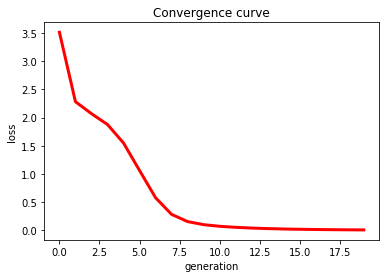

[[4.95155159 2.94100568 3.1815866  0.94554113]
 [4.01070116 2.39251074 2.86126862 1.04614038]
 [1.11817841 0.83828647 5.51006656 4.93841181]
 [1.00136188 0.73303926 4.44818695 3.94302201]
 [1.78321644 1.19485128 4.87969492 4.02244286]]


In [5]:
#1）FunkSVD算法演示demo
import numpy as np
import matplotlib.pyplot as plt

#========================================================
#  准备数据
#========================================================

def loadDataSet():
    R = [
        [5,3,0,1],
        [4,0,3,1],
        [1,1,0,5],
        [1,0,0,4],
        [0,1,5,4],
    ]
    return np.array(R)

#========================================================
#  FunkSVD算法
#========================================================

def FunkSVD(R, K, epochs = 1000, alpha = 0.1, beta = 0.02):
    #alpha 学习步长
    #beta 正则项参数
    result=[]

    # P、Q矩阵初始化
    P = np.random.rand(R.shape[0], K) #返回取值为[0,1）中的随机数
    Q = np.random.rand(R.shape[1], K)

    for epoch in range(epochs):
        print("current epoch is {}".format(epoch))
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if(R[i][j] > 0):   #等于0，表示打分空缺
                    P[i] = P[i] + alpha * ((R[i][j] - np.dot(P[i],Q[j].T))*Q[j] - beta * P[i])
                    Q[j] = Q[j] + alpha * ((R[i][j] - np.dot(P[i],Q[j].T))*P[i] - beta * Q[j])
        loss = 0
        num = 0
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                # 对有评分的项目，计算损失
                if(R[i][j] > 0):
                    num += 1
                    loss += np.power(R[i][j] - np.dot(P[i],Q[j].T), 2)
        loss = loss / num
        result.append(loss)
        if(loss < 0.01):
            print("finish")
            break
    return P, Q, result

def plot_train(result):
    n = len(result)
    x = range(n)
    plt.plot(x, result, color='r', linewidth=3)
    plt.title("Convergence curve")
    plt.xlabel("generation")
    plt.ylabel("loss")
    plt.show()

#========================================================
#  主程序
#========================================================

if __name__ == '__main__':
    R = loadDataSet()

    pred_P, pred_Q, result = FunkSVD(R, 2)
    plot_train(result)
    plt.show()
    pred_R = np.dot(pred_P, pred_Q.T)
    print(pred_R)

In [ ]:
#2）spark Mllib 推荐，使用FunkSVD算法
from pyspark import SparkContext
from pyspark import SparkConf

#========================================================
#  数据准备
#========================================================

sc = SparkContext("local", "testing")
# 打开用户评分文件，此文件是用户对项目的评分，文件每一行前3项分别是用户id，物品id，评分
user_data = sc.textFile("D:/movielens/ml-100k/u.data")
# 获取相关数据，即前3列
rates = user_data.map(lambda x: x.split("\t")[0:3])
# 将数据封装成 Rating 类
from pyspark.mllib.recommendation import Rating
rates_data = rates.map(
    lambda x: Rating(int(x[0]), int(x[1]), int(x[2])))  # 将字符串转为整型

#========================================================
#  训练模型
#========================================================

from pyspark.mllib.recommendation import ALS
from pyspark.mllib.recommendation import MatrixFactorizationModel
sc.setCheckpointDir('checkpoint/')
ALS.checkpointInterval = 2
model = ALS.train(ratings=rates_data, rank=20, iterations=5, lambda_=0.02)

#========================================================
#  预测评分与推荐
#========================================================
# 预测用户38对物品20的评分
print(model.predict(38, 20))
# 预测用户38最喜欢的10个物品
print(model.recommendProducts(38, 10))

In [10]:
#3） 工具包 pyreclab
import time
import pyreclab

if __name__ == '__main__':

   svd = pyreclab.SVD( dataset = '../data/u1.base',
                       dlmchar = b'\t',
                       header = False,
                       usercol = 0,
                       itemcol = 1,
                       ratingcol = 2 )

   print( '-> training model' )
   start = time.clock()
   svd.train( factors = 1000, maxiter = 100, lr = 0.01, lamb = 0.1 )
   end = time.clock()
   print( 'training time: ' + str( end - start ) )

   print( '-> individual test' )
   pred = svd.predict( '457', '443' )
   print( 'user 457, item 443, prediction ' + str( pred ) )

   ranking = svd.recommend( '457', 5, includeRated = False )
   print( 'recommendation for user 457: ' + str( ranking ) )

   print( '-> prediction test' )
   start = time.clock()
   predlist, mae, rmse = svd.test( input_file = '../data/u1.test',
                                   dlmchar = b'\t',
                                   header = False,
                                   usercol = 0,
                                   itemcol = 1,
                                   ratingcol = 2,
                                   output_file = 'predictions.csv' )
   end = time.clock()
   print( 'prediction time: ' + str( end - start ) )

   print( 'MAE: ' + str( mae ) )
   print( 'RMSE: ' + str( rmse ) )

   print( '-> recommendation test' )
   start = time.clock()
   recommendList, maprec, ndcg = svd.testrec( input_file = '../data/u1.test',
                                              dlmchar = b'\t',
                                              header = False,
                                              usercol = 0,
                                              itemcol = 1,
                                              ratingcol = 2,
                                              topn = 10,
                                              output_file = 'ranking.json',
                                              relevance_threshold = 2,
                                              includeRated = False )
   end = time.clock()
   print( 'recommendation time: ' + str( end - start ) )

   print( 'MAP: ' + str( maprec ) )
   print( 'nDCG: ' + str( ndcg ) )

   mapUser10 = svd.MAP( user_id = '10', topn = 10, relevance_threshold = 2, include_rated = False )
   ndcgUser10 = svd.nDCG( user_id = '10', topn = 10, relevance_threshold = 2, include_rated = False  )
   print( 'user 10 MAP: ' + str( mapUser10 ) )
   print( 'user 10 nDCG: ' + str( ndcgUser10 ) )

-> training model
training time: 61.31
-> individual test
user 457, item 443, prediction 4.404746055603027
recommendation for user 457: ['408', '1449', '1642', '513', '480']
-> prediction test
prediction time: 0.27000000000001023
MAE: 0.7310788683050355
RMSE: 0.9225008930116988
-> recommendation test
recommendation time: 2.049999999999983
MAP: 0.18547135195441236
nDCG: 0.12443097705466884
user 10 MAP: 0.3333333432674408
user 10 nDCG: 0.2710884709729799


### 4.基于模型算法

[DeepFM example](https://github.com/ChenglongChen/tensorflow-DeepFM)    
包含deep，FM，deepFM模型

In [ ]:
import os
import sys

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

sys.path.append("./DeepFm")
import config
from metrics import gini_norm
from DataReader import FeatureDictionary, DataParser
from DeepFM import DeepFM

gini_scorer = make_scorer(gini_norm, greater_is_better=True, needs_proba=True)


def _load_data():

    dfTrain = pd.read_csv(config.TRAIN_FILE)
    dfTest = pd.read_csv(config.TEST_FILE)

    def preprocess(df):
        cols = [c for c in df.columns if c not in ["id", "target"]]
        df["missing_feat"] = np.sum((df[cols] == -1).values, axis=1)
        df["ps_car_13_x_ps_reg_03"] = df["ps_car_13"] * df["ps_reg_03"]
        return df

    dfTrain = preprocess(dfTrain)
    dfTest = preprocess(dfTest)

    cols = [c for c in dfTrain.columns if c not in ["id", "target"]]
    cols = [c for c in cols if (not c in config.IGNORE_COLS)]

    X_train = dfTrain[cols].values
    y_train = dfTrain["target"].values
    X_test = dfTest[cols].values
    ids_test = dfTest["id"].values
    cat_features_indices = [
        i for i, c in enumerate(cols) if c in config.CATEGORICAL_COLS
    ]

    return dfTrain, dfTest, X_train, y_train, X_test, ids_test, cat_features_indices


def _run_base_model_dfm(dfTrain, dfTest, folds, dfm_params):
    fd = FeatureDictionary(dfTrain=dfTrain,
                           dfTest=dfTest,
                           numeric_cols=config.NUMERIC_COLS,
                           ignore_cols=config.IGNORE_COLS)
    data_parser = DataParser(feat_dict=fd)
    Xi_train, Xv_train, y_train = data_parser.parse(df=dfTrain, has_label=True)
    Xi_test, Xv_test, ids_test = data_parser.parse(df=dfTest)

    dfm_params["feature_size"] = fd.feat_dim
    dfm_params["field_size"] = len(Xi_train[0])

    y_train_meta = np.zeros((dfTrain.shape[0], 1), dtype=float)
    y_test_meta = np.zeros((dfTest.shape[0], 1), dtype=float)
    _get = lambda x, l: [x[i] for i in l]
    gini_results_cv = np.zeros(len(folds), dtype=float)
    gini_results_epoch_train = np.zeros((len(folds), dfm_params["epoch"]),
                                        dtype=float)
    gini_results_epoch_valid = np.zeros((len(folds), dfm_params["epoch"]),
                                        dtype=float)
    for i, (train_idx, valid_idx) in enumerate(folds):
        Xi_train_, Xv_train_, y_train_ = _get(Xi_train, train_idx), _get(
            Xv_train, train_idx), _get(y_train, train_idx)
        Xi_valid_, Xv_valid_, y_valid_ = _get(Xi_train, valid_idx), _get(
            Xv_train, valid_idx), _get(y_train, valid_idx)

        dfm = DeepFM(**dfm_params)
        dfm.fit(Xi_train_, Xv_train_, y_train_, Xi_valid_, Xv_valid_, y_valid_)

        y_train_meta[valid_idx, 0] = dfm.predict(Xi_valid_, Xv_valid_)
        y_test_meta[:, 0] += dfm.predict(Xi_test, Xv_test)

        gini_results_cv[i] = gini_norm(y_valid_, y_train_meta[valid_idx])
        gini_results_epoch_train[i] = dfm.train_result
        gini_results_epoch_valid[i] = dfm.valid_result

    y_test_meta /= float(len(folds))

    # save result
    if dfm_params["use_fm"] and dfm_params["use_deep"]:
        clf_str = "DeepFM"
    elif dfm_params["use_fm"]:
        clf_str = "FM"
    elif dfm_params["use_deep"]:
        clf_str = "DNN"
    print("%s: %.5f (%.5f)" %
          (clf_str, gini_results_cv.mean(), gini_results_cv.std()))
    filename = "%s_Mean%.5f_Std%.5f.csv" % (clf_str, gini_results_cv.mean(),
                                            gini_results_cv.std())
    _make_submission(ids_test, y_test_meta, filename)

    _plot_fig(gini_results_epoch_train, gini_results_epoch_valid, clf_str)

    return y_train_meta, y_test_meta


def _make_submission(ids, y_pred, filename="submission.csv"):
    pd.DataFrame({
        "id": ids,
        "target": y_pred.flatten()
    }).to_csv(os.path.join(config.SUB_DIR, filename),
              index=False,
              float_format="%.5f")


def _plot_fig(train_results, valid_results, model_name):
    colors = ["red", "blue", "green"]
    xs = np.arange(1, train_results.shape[1] + 1)
    plt.figure()
    legends = []
    for i in range(train_results.shape[0]):
        plt.plot(xs,
                 train_results[i],
                 color=colors[i],
                 linestyle="solid",
                 marker="o")
        plt.plot(xs,
                 valid_results[i],
                 color=colors[i],
                 linestyle="dashed",
                 marker="o")
        legends.append("train-%d" % (i + 1))
        legends.append("valid-%d" % (i + 1))
    plt.xlabel("Epoch")
    plt.ylabel("Normalized Gini")
    plt.title("%s" % model_name)
    plt.legend(legends)
    plt.savefig("./fig/%s.png" % model_name)
    plt.close()


# load data
dfTrain, dfTest, X_train, y_train, X_test, ids_test, cat_features_indices = _load_data(
)

# folds
folds = list(
    StratifiedKFold(n_splits=config.NUM_SPLITS,
                    shuffle=True,
                    random_state=config.RANDOM_SEED).split(X_train, y_train))

# ------------------ DeepFM Model ------------------
# params
dfm_params = {
    "use_fm": True,
    "use_deep": True,
    "embedding_size": 8,
    "dropout_fm": [1.0, 1.0],
    "deep_layers": [32, 32],
    "dropout_deep": [0.5, 0.5, 0.5],
    "deep_layers_activation": tf.nn.relu,
    "epoch": 30,
    "batch_size": 1024,
    "learning_rate": 0.001,
    "optimizer_type": "adam",
    "batch_norm": 1,
    "batch_norm_decay": 0.995,
    "l2_reg": 0.01,
    "verbose": True,
    "eval_metric": gini_norm,
    "random_seed": config.RANDOM_SEED
}
y_train_dfm, y_test_dfm = _run_base_model_dfm(dfTrain, dfTest, folds,
                                              dfm_params)

# ------------------ FM Model ------------------
fm_params = dfm_params.copy()
fm_params["use_deep"] = False
y_train_fm, y_test_fm = _run_base_model_dfm(dfTrain, dfTest, folds, fm_params)

# ------------------ DNN Model ------------------
dnn_params = dfm_params.copy()
dnn_params["use_fm"] = False
y_train_dnn, y_test_dnn = _run_base_model_dfm(dfTrain, dfTest, folds,
                                              dnn_params)